In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

In [41]:
data = pd.read_csv('D:/Sensorprobe/model_new_01.csv')

In [42]:
data.head()

,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R3_1,R3_2,R3_3,R3_4,R3_5,R3_6,R4_1,R4_2,R4_3,R4_4,R4_5,R4_6,class,activity
0,0.001111,0.000219,0.000439,0.000362,0.000342,0.000650,0.000268,0.000650,0.000537,0.000116,0.000094,0.000552,0.000920,0.001127,0.000246,0.000292,0.000431,0.001656,1,drilling
1,0.001377,0.001184,0.001193,0.000865,0.000210,0.001131,0.001096,0.000345,0.000496,0.000823,0.000070,0.000124,0.000499,0.000291,0.000759,0.000554,0.001224,0.001280,1,drilling
2,0.000603,0.001458,0.001701,0.001461,0.000691,0.001315,0.000762,0.000343,0.000061,0.000129,0.000610,0.000255,0.000404,0.000404,0.000598,0.001617,0.002922,0.001125,1,drilling
3,0.000647,0.001622,0.001138,0.001645,0.000174,0.000324,0.000486,0.000302,0.000255,0.000283,0.000259,0.000209,0.000935,0.000325,0.001138,0.000907,0.002185,0.001153,1,drilling
4,0.000496,0.002436,0.001304,0.001717,0.000259,0.001168,0.001910,0.000633,0.000451,0.000512,0.000406,0.000285,0.000265,0.000633,0.001719,0.000485,0.002365,0.001859,1,drilling


In [43]:

# plt.title('Activity', fontsize=22, fontweight='bold')
# plt.xlabel('Data points', fontsize=18, fontweight='bold')
# plt.ylabel('Amplitude(um)', fontsize=18, fontweight='bold')
# plt.grid(True)
# plt.legend(['R1_1'])

# # Set the text size of the tick labels on both axes
# plt.tick_params(axis='both', labelsize=18)
# plt.plot(data.index, data[['R1_1','R1_2', 'R1_3', 'R1_4', 'R1_5', 'R1_6']])

In [44]:
# plt.title('Activity', fontsize=22, fontweight='bold')
# plt.xlabel('Data points', fontsize=18, fontweight='bold')
# plt.ylabel('Amplitude(um)', fontsize=18, fontweight='bold')
# plt.grid(True)
# plt.legend(['R1_1'])

# # Set the text size of the tick labels on both axes
# plt.tick_params(axis='both', labelsize=18)
# plt.plot(data.index, data[['R1_1','R1_2', 'R1_3', 'R1_4', 'R1_5', 'R1_6','R3_1','R3_2', 'R3_3', 'R3_4', 'R3_5', 'R3_6','R4_1','R4_2', 'R4_3', 'R4_4', 'R4_5', 'R4_6']])

In [45]:
# plt.title('Activity', fontsize=22, fontweight='bold')
# plt.xlabel('Data points', fontsize=18, fontweight='bold')
# plt.ylabel('Amplitude(um)', fontsize=18, fontweight='bold')
# plt.grid(True)
# plt.legend(['R1_1'])

# # Set the text size of the tick labels on both axes
# plt.tick_params(axis='both', labelsize=18)
# plt.plot(data.index, data[['R4_1','R4_2', 'R4_3', 'R4_4', 'R4_5', 'R4_6']])

In [46]:
# plt.title('Activity', fontsize=22, fontweight='bold')
# plt.xlabel('Data points', fontsize=18, fontweight='bold')
# plt.ylabel('Amplitude(um)', fontsize=18, fontweight='bold')
# plt.grid(True)
# plt.legend(['R1_1'])

# # Set the text size of the tick labels on both axes
# plt.tick_params(axis='both', labelsize=18)
# plt.plot(data.index, data[['R3_1','R3_2', 'R3_3', 'R3_4', 'R3_5', 'R3_6']])

In [47]:
# Preprocessing
X = data.drop(['class', 'activity'], axis=1).values
y = data['class']
y_encoded = to_categorical(y, num_classes=6)

In [48]:
X

array([[0.00111146, 0.00021873, 0.00043852, ..., 0.00029194, 0.00043094,
        0.00165591],
       [0.00137673, 0.00118353, 0.00119263, ..., 0.00055419, 0.00122361,
        0.00128042],
       [0.00060274, 0.00145844, 0.00170147, ..., 0.00161743, 0.00292213,
        0.00112524],
       ...,
       [0.01101331, 0.03137412, 0.01046781, ..., 0.04730996, 0.0076363 ,
        0.02107433],
       [0.00998886, 0.02945152, 0.01702933, ..., 0.04261612, 0.01808694,
        0.02087543],
       [0.00956632, 0.0218521 , 0.01709045, ..., 0.03007908, 0.02644705,
        0.01584081]])

In [49]:
# Split segmented data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)


In [50]:
# Überprüfe die Form der Eingabedaten
print("Shape von X_train", X_train.shape)

Shape von X_train (2673, 18)


In [51]:
print("Size of x:", len(X))
print("Size of y:", len(y))


Size of x: 3713
Size of y: 3713


In [52]:
print("X_train shape before reshaping:", X_train.shape)
print("X_test shape before reshaping:", X_test.shape)


X_train shape before reshaping: (2673, 18)
X_test shape before reshaping: (743, 18)


In [53]:

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=(X.shape[1])))
model.add(Flatten()) 
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(6, activation='softmax'))

In [54]:
# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1216      
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

In [56]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

In [57]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/300
42/42 [==============================] - 1s 9ms/step - loss: 1.3094 - accuracy: 0.5021 - val_loss: 1.6840 - val_accuracy: 0.4545
Epoch 2/300
42/42 [==============================] - 0s 3ms/step - loss: 0.8863 - accuracy: 0.6727 - val_loss: 1.5994 - val_accuracy: 0.4545
Epoch 3/300
42/42 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.7127 - val_loss: 1.5280 - val_accuracy: 0.4545
Epoch 4/300
42/42 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.7538 - val_loss: 1.4800 - val_accuracy: 0.4545
Epoch 5/300
42/42 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.7647 - val_loss: 1.4664 - val_accuracy: 0.4545
Epoch 6/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5535 - accuracy: 0.7838 - val_loss: 1.4198 - val_accuracy: 0.4545
Epoch 7/300
42/42 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7826 - val_loss: 1.4044 - val_accuracy: 0.4545
Epoch 8/300
4

In [58]:
# Predict using the trained model
y_pred = model.predict(X_test)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000250E4221760>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000250E4221760>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

In [59]:
test_loss, test_acc = model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 968us/step - loss: 0.3381 - accuracy: 0.7927


<Axes: title={'center': 'Training examples by activity type'}, xlabel='activity'>

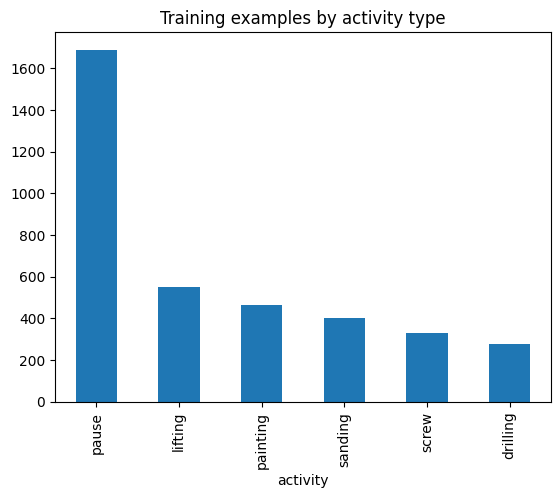

In [60]:
data['activity'].value_counts().plot(kind='bar', title='Training examples by activity type')

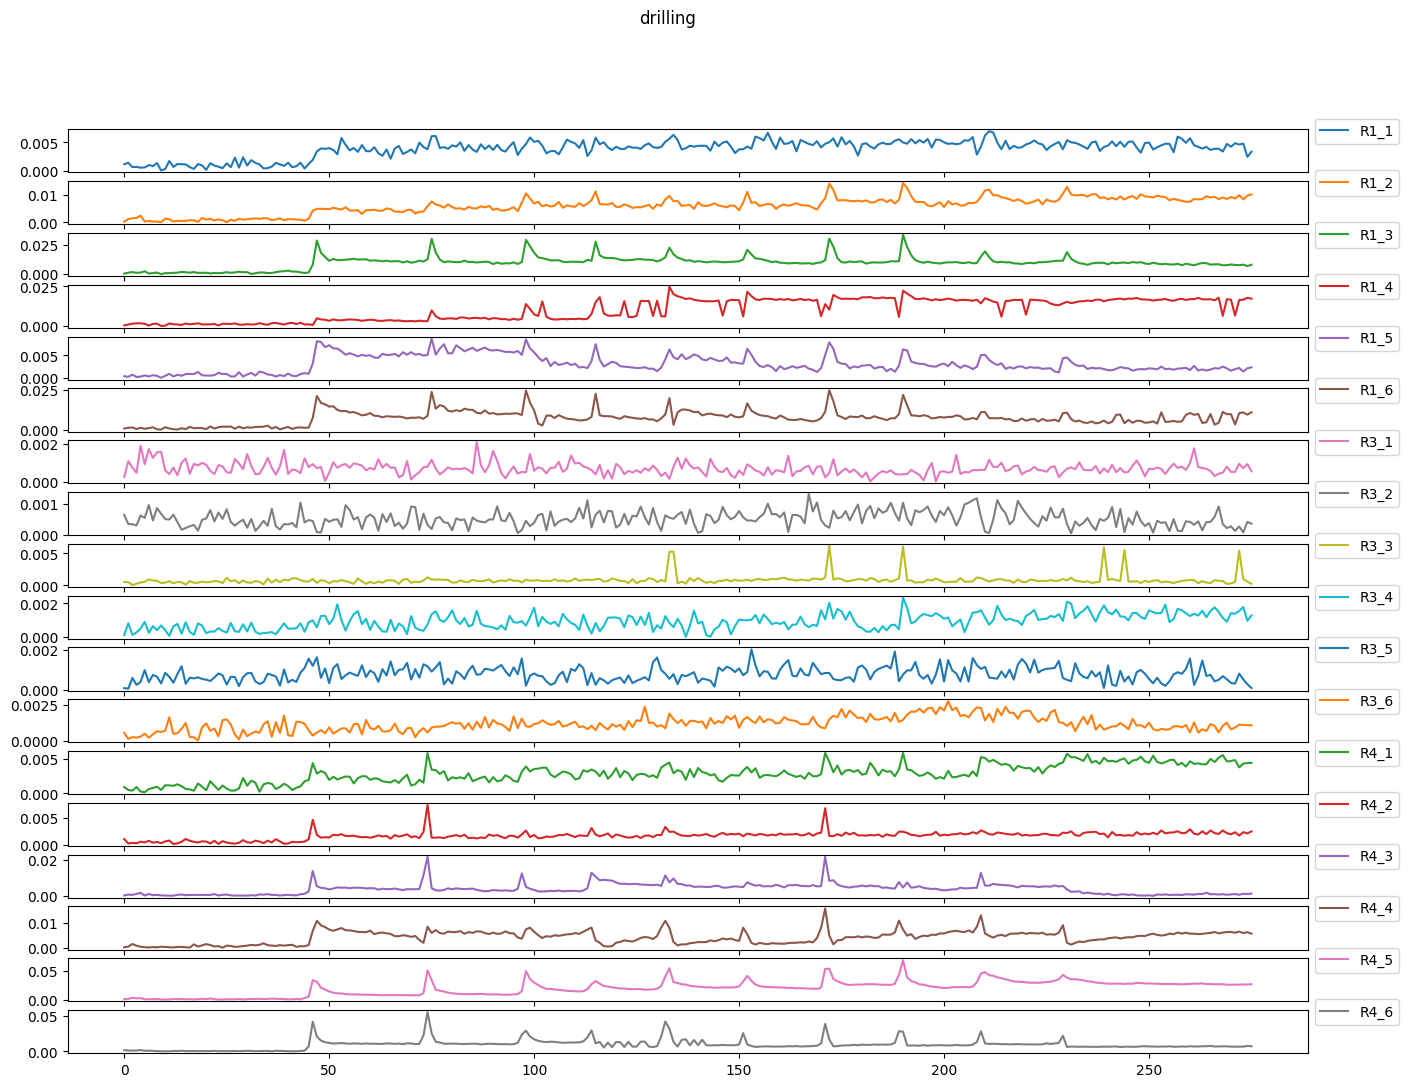

In [62]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['R1_1', 'R1_2', 'R1_3', 'R1_4', 'R1_5', 'R1_6', 'R3_1', 'R3_2', 'R3_3', 'R3_4', 'R3_5', 'R3_6', 'R4_1', 'R4_2', 'R4_3', 'R4_4', 'R4_5', 'R4_6']]
    axis = data.plot(subplots=True, figsize=(16, 12), title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

plot_activity("drilling", data)


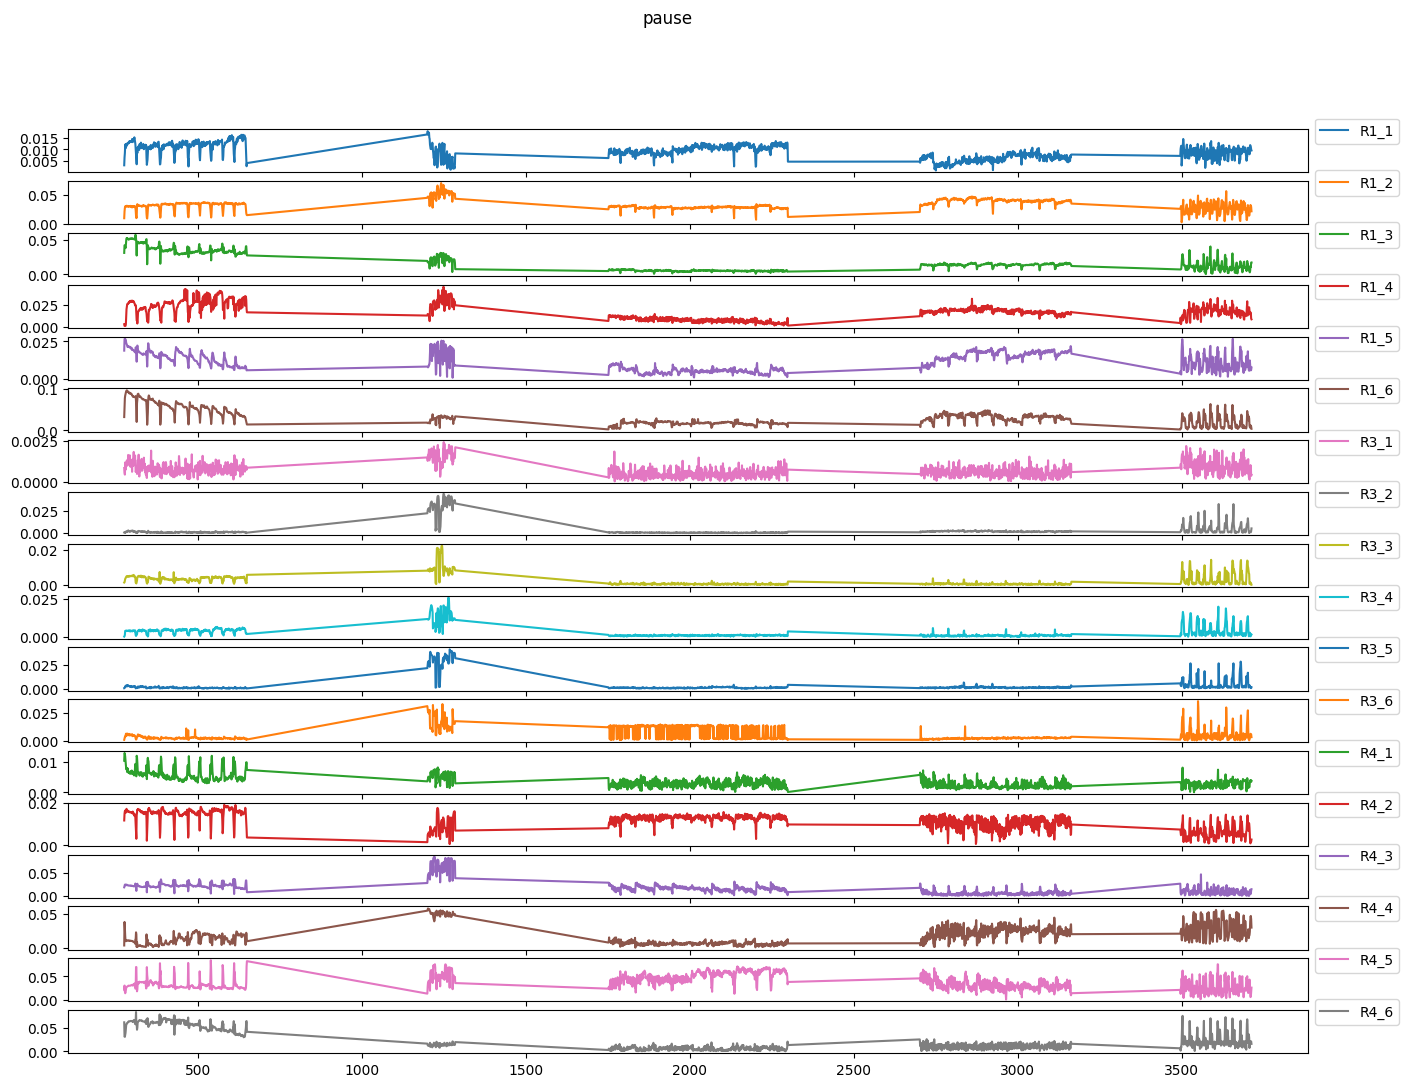

In [63]:
plot_activity("pause", data)

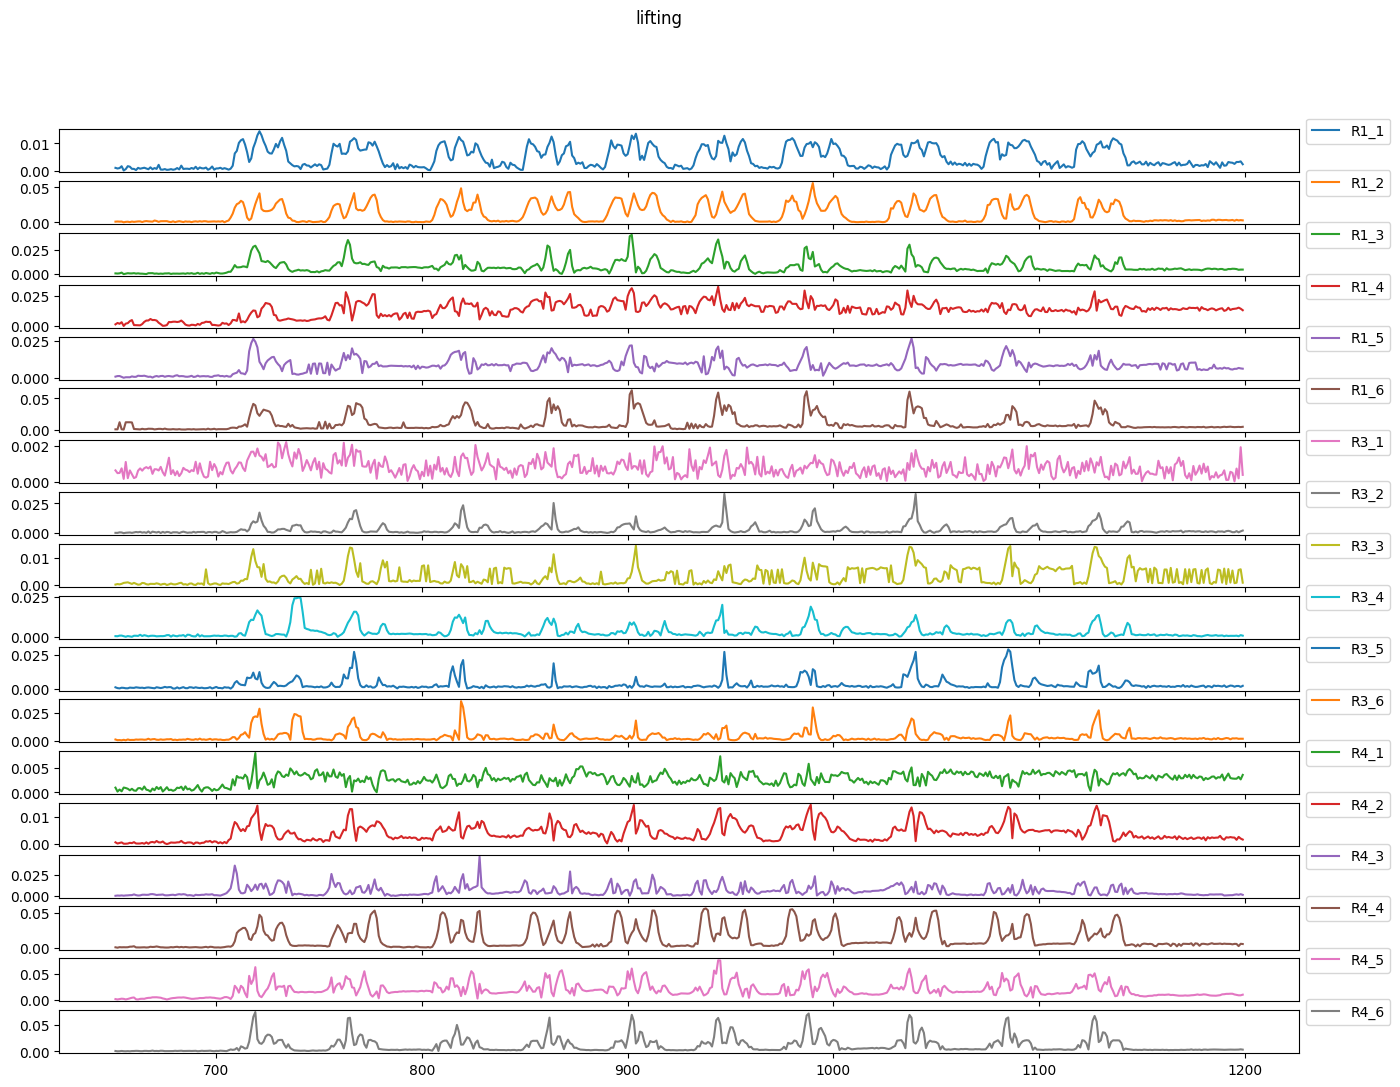

In [64]:
plot_activity("lifting", data)

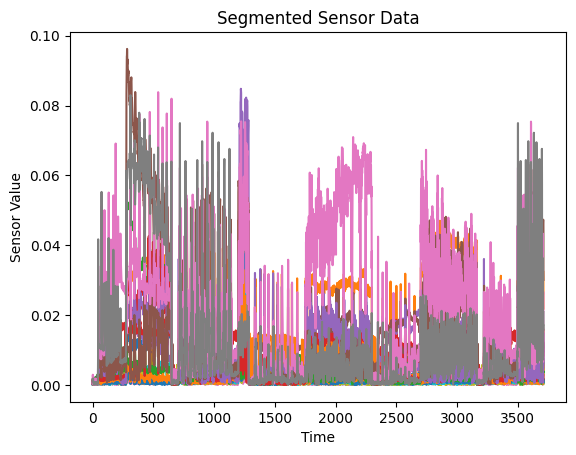

In [66]:
plt.plot(X) 
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.title('Segmented Sensor Data')
plt.show()

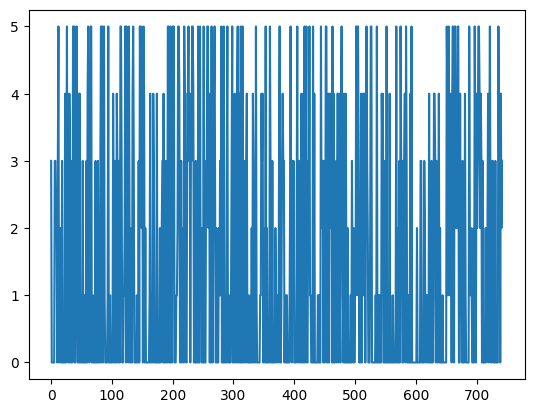

In [67]:
#%matplotlib qt
# Convert predicted probabilities to binary labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to binary labels
y_true_labels = np.argmax(y_test, axis=1)
plt.plot(y_pred_labels)
plt.show()

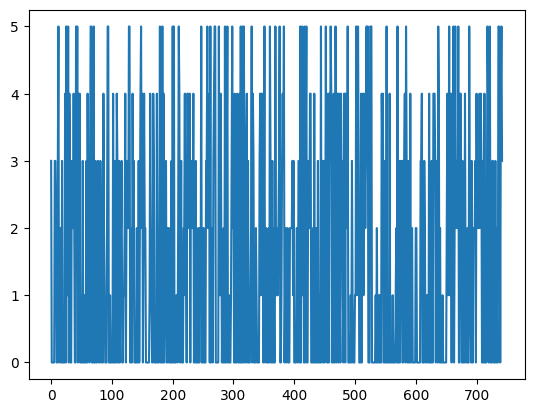

In [68]:
plt.plot(y_true_labels)
plt.show()

In [69]:
total = 0  

output_lines = [
    f"Predicted Class: {pred}    True Class: {true}\n"
    for pred, true in zip(y_pred_labels, y_true_labels)
]

total = len(output_lines)

output = "\n".join(output_lines)
print(output)

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_true_labels, y_pred_labels)

print("Total:", total)  
print("Accuracy:", accuracy)



Predicted Class: 3    True Class: 3

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 3    True Class: 3

Predicted Class: 3    True Class: 3

Predicted Class: 2    True Class: 2

Predicted Class: 2    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 3    True Class: 3

Predicted Class: 5    True Class: 5

Predicted Class: 0    True Class: 0

Predicted Class: 2    True Class: 2

Predicted Class: 2    True Class: 2

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 3    True Class: 3

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 4    True Class: 4

Predicted Class: 0    True Class: 0

Predicted Class: 2    True Class: 5

Predicted Class: 5    True Class: 2

P

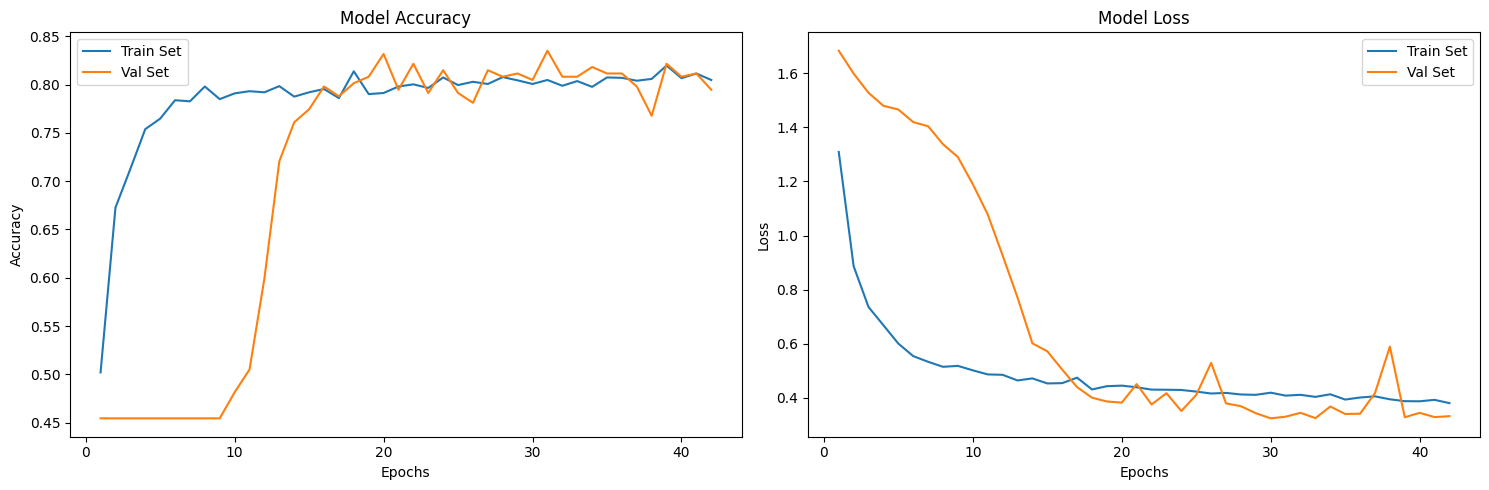

In [70]:

# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()
